# Colab 연습

In [2]:
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [3]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0


In [4]:
!head -n 3 /proc/meminfo

MemTotal:       13333596 kB
MemFree:        10749872 kB
MemAvailable:   12516936 kB


In [5]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [6]:
!pwd

/content


In [7]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Feb  4 15:26 sample_data


In [8]:
!ls -l sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Feb  4 15:26 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Feb  4 15:26 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Feb  4 15:26 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Feb  4 15:26 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [9]:
!cat sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


In [10]:
!python --version

Python 3.6.9


In [11]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [12]:
from tensorflow import keras
keras.__version__

'2.4.0'

In [13]:
print('한글')

한글


In [14]:
!hostname

026f1b36fd32


### MNIST 손글씨 분류

#### 1. Machine Learning (SVM)

In [15]:
import numpy as np
import pandas as pd
mnist = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
mnist.shape

(20000, 785)

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.iloc[:, 1:], mnist.iloc[:, 0], test_size=0.25, stratify=mnist.iloc[:, 0], random_state=2021)
X_train.shape, X_test.shape

((15000, 784), (5000, 784))

In [19]:
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255

In [20]:
sv = SVC()
sv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
pred = sv.predict(X_test)
accuracy_score(y_test, pred)

0.9714

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

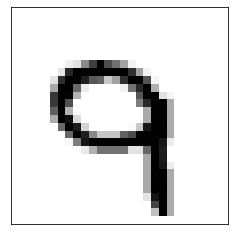

In [24]:
digit = X_test.iloc[1000, :].values.reshape(28, 28)
plt.figure(figsize=(4, 4))
plt.xticks([]); plt.yticks([])
plt.imshow(digit, cmap=plt.cm.binary, interpolation='nearest')
plt.show()

#### Deep Learning

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((15000, 10), (5000, 10))

In [28]:
# Model 생성
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 다중 분류 시 (이진 분류: binary_crossentropy)

In [30]:
# 모델 실행
model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=200) # validation_split: 검증 데이터 비율, epochs: 반복 횟수, batch_size: 한 번에 다룰 데이터 양

Epoch 1/20
60/60 [==============================] - 2s 20ms/step - loss: 1.0392 - accuracy: 0.6997 - val_loss: 0.2837 - val_accuracy: 0.9117
Epoch 2/20
60/60 [==============================] - 1s 15ms/step - loss: 0.2346 - accuracy: 0.9331 - val_loss: 0.2158 - val_accuracy: 0.9373
Epoch 3/20
60/60 [==============================] - 1s 15ms/step - loss: 0.1563 - accuracy: 0.9583 - val_loss: 0.1921 - val_accuracy: 0.9433
Epoch 4/20
60/60 [==============================] - 1s 15ms/step - loss: 0.1148 - accuracy: 0.9699 - val_loss: 0.1748 - val_accuracy: 0.9533
Epoch 5/20
60/60 [==============================] - 1s 15ms/step - loss: 0.0787 - accuracy: 0.9808 - val_loss: 0.1575 - val_accuracy: 0.9550
Epoch 6/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0578 - accuracy: 0.9860 - val_loss: 0.1583 - val_accuracy: 0.9533
Epoch 7/20
60/60 [==============================] - 1s 15ms/step - loss: 0.0429 - accuracy: 0.9900 - val_loss: 0.1519 - val_accuracy: 0.9590
Epoch 8/20
60

In [31]:
model.evaluate(X_test, Y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.1157 - accuracy: 0.9688


[0.11572793871164322, 0.9688000082969666]

In [32]:
print(f'Accuracy = {model.evaluate(X_test, Y_test)[1]:.4f}')

157/157 [==============================] - 1s 4ms/step - loss: 0.1157 - accuracy: 0.9688
Accuracy = 0.9688
